# Market Segmentation with Neural Networks.


#### In this project, you will build a neural network model that can segment markets based on demographics, behavior, and other relevant factors. You will start by exploring a dataset of customer data, such as the Online Retail Dataset or the Bank Marketing Dataset, and performing EDA to gain insights into the data. You will analyze the correlation between different features and identify any outliers or missing values that need to be handled. 

<b>Datasets:-</b>

Bank Marketing Data: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

Online Retail Data: https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#### Load the data
#### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


In [4]:
df = df=pd.read_csv("bank-additional-full.csv",sep=';')
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29230,36,admin.,divorced,high.school,no,no,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
35815,26,entrepreneur,single,high.school,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
31929,33,admin.,divorced,university.degree,no,no,yes,cellular,may,thu,...,8,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
26547,35,blue-collar,married,basic.6y,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
11626,48,blue-collar,married,basic.4y,no,no,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<b>It seems that ther is no nul values.</b>

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data preprocessing


In [7]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column }: {df[column].unique()}') 
 
print_unique_col_values(df) 

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


<b>We can see there are some binary columns(y) which are object type, we need to convert into numeric value.
There are categorical columns also, but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.


#### Creating one-hot encoding for non-numeric marital column

<b>For marital column, we have three values married, single and divorced. We will use pandas’
<b style="color:blue;">get_dummies</b> function to convert categorical variable into dummy/indicator variables.</b>

#### Creating one hot encoding for job column

In [8]:
job_dummies = pd.get_dummies(df['job'], prefix = 'job', dtype=int)
# Drop job_unknown column
job_dummies.drop('job_unknown', axis=1, inplace=True)
#Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,0


#### Creating one hot encoding for material column


In [9]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital', dtype=int)
# Merge marital_dummies with marital column
pd.concat([df['marital'], marital_dummies], axis=1).head(n=10)
# Remove marital_divorced column
marital_dummies.drop(['marital_unknown','marital_divorced'], axis=1, inplace=True)
# Merge marital_dummies into main dataframe
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0


#### Creating one hot encoding for education column

In [10]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education', dtype=int)
# Drop job_unknown column
education_dummies.drop('education_unknown', axis=1, inplace=True)
#Merge job_dummies into main dataframe
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_unemployed,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,0,0,1,0,0,0


#### Creating one hot encoding for default column 

In [11]:
default_dummies = pd.get_dummies(df['default'], prefix = 'default', dtype=int)
# Drop default_unknown column
default_dummies.drop('default_unknown', axis=1, inplace=True)
#Merge default_dummies into main dataframe
df = pd.concat([df, default_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,1,0,0,0,1,0


#### Creating one hot encoding for housing column


In [12]:
housing_dummies = pd.get_dummies(df['housing'], prefix = 'housing', dtype=int)
# Drop housing_unknown column
housing_dummies.drop('housing_unknown', axis=1, inplace=True)
#Merge housing_dummies into main dataframe
df = pd.concat([df, housing_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,1,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,1,0,0,0,1,0,1,0


#### Creating one hot encoding for loan column 


In [13]:
loan_dummies = pd.get_dummies(df['loan'], prefix = 'loan', dtype=int)
# Drop loan_unknown column
loan_dummies.drop('loan_unknown', axis=1, inplace=True)
#Merge loan_dummies into main dataframe
df = pd.concat([df, loan_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,1,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,1,0,1,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,1,0,0,1


#### Creating one hot encoding for contact column


In [14]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact', dtype=int)
#Merge contact_dummies into main dataframe
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,1,0,1,0,1,0,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,0,1,0,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,1,0,0,1,1,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,1,0,1,0,1,0,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,1,0,1,0,0,1,0,1


#### Creating one hot encoding for poutcome column


In [15]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome', dtype='int')
#Merge poutcome_dummies into main dataframe
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,1,0,0,1,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,0,1,0,0,1,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,1,1,0,0,1,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,0,1,0,0,1,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,1,0,1,0


#### Convert month column into numeric value


In [16]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9], dtype=int64)

#### Convert day_of_week column into numeric value

In [17]:
day_of_weeks = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df['day_of_week'] = df['day_of_week'].map(day_of_weeks)
df['day_of_week'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

#### pdays column


<b>‘pdays’ column indicates the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). If the value of ‘pdays’ is ‘-1’, if so we will associate that with a value of 0,</b>

In [18]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if (row == 0 or row == 999) else 1)
df[['pdays','was_contacted']].head()
df['was_contacted'].value_counts()
# df['pdays'].value_counts()
df['was_contacted'].value_counts()

was_contacted
0    39688
1     1500
Name: count, dtype: int64

#### Convert target column ‘y’ into numeric value


In [19]:
df['subscribe'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

#### Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns
 

In [20]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  int64  
 2   day_of_week                    41188 non-null  int64  
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  job_admin.                     41188 non-null  int32  
 12  job_blue-collar                41188 non-null 

In [22]:
df

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,was_contacted,subscribe
0,56,5,1,261,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,1,0,1,0,0,0
1,57,5,1,149,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,1,0,1,0,0,0
2,37,5,1,226,1,0,1.1,93.994,-36.4,4.857,...,1,1,0,0,1,0,1,0,0,0
3,40,5,1,151,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,1,0,1,0,0,0
4,56,5,1,307,1,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,0,-1.1,94.767,-50.8,1.028,...,1,1,0,1,0,0,1,0,0,1
41184,46,11,5,383,1,0,-1.1,94.767,-50.8,1.028,...,0,1,0,1,0,0,1,0,0,0
41185,56,11,5,189,2,0,-1.1,94.767,-50.8,1.028,...,1,1,0,1,0,0,1,0,0,0
41186,44,11,5,442,1,0,-1.1,94.767,-50.8,1.028,...,0,1,0,1,0,0,1,0,0,1


In [24]:
df['subscribe'].value_counts() 

subscribe
0    36548
1     4640
Name: count, dtype: int64

#### Data Visualization

<Axes: >

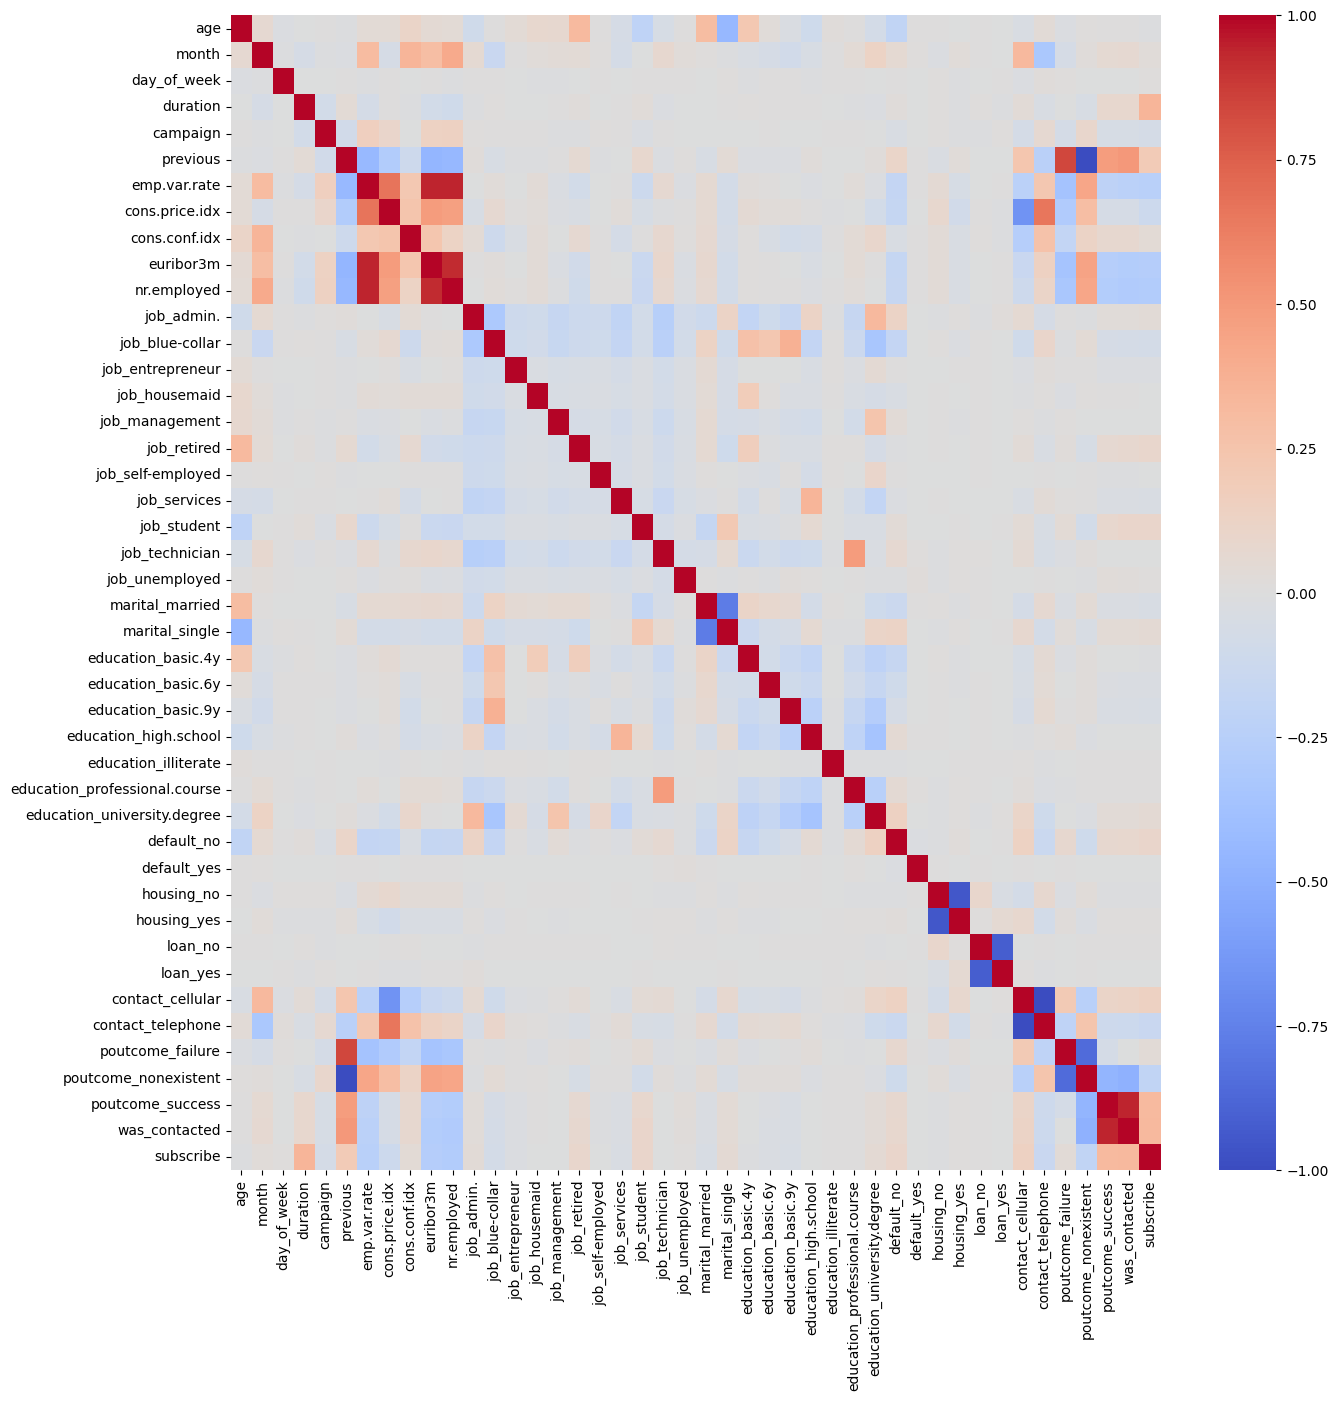

In [40]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

#### Inferences: 
From the above heat map we can see that 'y_yes' (our target variable) has good correlation with <b>'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome_success' and 'poutcome_nonexistent'.</b> We expect to see these independent variables as significant while building the models.



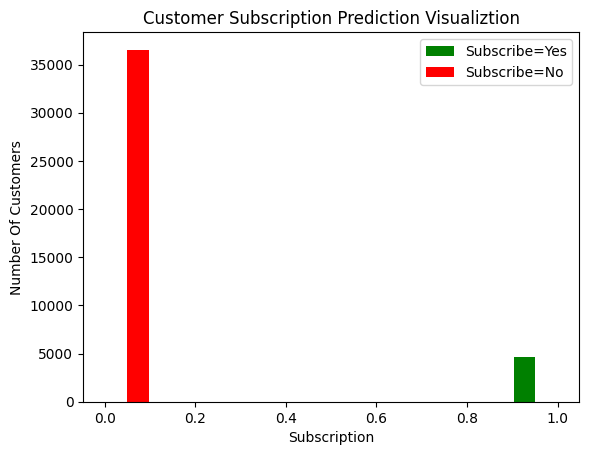

In [25]:
subscribe_no = df[df.subscribe == 0].subscribe
subscribe_yes = df[df.subscribe == 1].subscribe

plt.xlabel("Subscription")
plt.ylabel("Number Of Customers")
plt.title("Customer Subscription Prediction Visualiztion")

plt.hist([subscribe_yes, subscribe_no], rwidth=0.95, color=['green','red'],label=['Subscribe=Yes','Subscribe=No'])
plt.legend()

#### Train test split


In [26]:
X = df.drop('subscribe',axis='columns')
y = df['subscribe']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### Build a model (ANN) in tensorflow/keras

In [27]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(43,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1030/1030 [==============================] - 4s 1ms/step - loss: 5.4966 - accuracy: 0.8687
Epoch 2/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8902
Epoch 3/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.3220 - accuracy: 0.8915
Epoch 4/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.8927
Epoch 5/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.3062 - accuracy: 0.8939
Epoch 6/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.3121 - accuracy: 0.8942
Epoch 7/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2640 - accuracy: 0.8988
Epoch 8/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2742 - accuracy: 0.8968
Epoch 9/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2585 - accuracy: 0.9000
Epoch 10/100
1030/1030 [==============================] - 1s 1ms/step - l

1030/1030 [==============================] - 1s 1ms/step - loss: 0.1997 - accuracy: 0.9100
Epoch 80/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2007 - accuracy: 0.9103
Epoch 81/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2013 - accuracy: 0.9083
Epoch 82/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2011 - accuracy: 0.9095
Epoch 83/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.1994 - accuracy: 0.9093
Epoch 84/100
1030/1030 [==============================] - 1s 1ms/step - loss: 0.2008 - accuracy: 0.9079
Epoch 85/100
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1990 - accuracy: 0.9097
Epoch 86/100
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1991 - accuracy: 0.9108
Epoch 87/100
1030/1030 [==============================] - 2s 2ms/step - loss: 0.1993 - accuracy: 0.9094
Epoch 88/100
1030/1030 [==============================] - 2s 2ms/step - loss:

#### Model evaluation

In [28]:
model.evaluate(X_test, y_test)

258/258 [==============================] - 0s 1ms/step - loss: 0.2072 - accuracy: 0.9037


[0.20723038911819458, 0.903738796710968]

#### Model prediction

In [29]:
yp = model.predict(X_test)
yp[:5]

258/258 [==============================] - 0s 942us/step


array([[0.00370202],
       [0.00206918],
       [0.10050806],
       [0.08551181],
       [0.05460918]], dtype=float32)

In [30]:
y_pred = []
subscribed=0
unsubscibed=0
for element in yp:
    if element > 0.5:
        y_pred.append(1)
        subscribed += 1
    else:
        y_pred.append(0)
        unsubscibed += 1
        
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [31]:
print("Subscribed:       ", subscribed, "       ",round(subscribed/len(y_pred),2) ,"%" )
print("Didn't subscribe: ", unsubscibed, "      " ,round(unsubscibed/len(y_pred),2) ,"%" )

Subscribed:        812         0.1 %
Didn't subscribe:  7426        0.9 %


In [74]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7245
           1       0.62      0.51      0.56       993

    accuracy                           0.90      8238
   macro avg       0.78      0.73      0.75      8238
weighted avg       0.90      0.90      0.90      8238



tf.Tensor(7445, shape=(), dtype=int32)


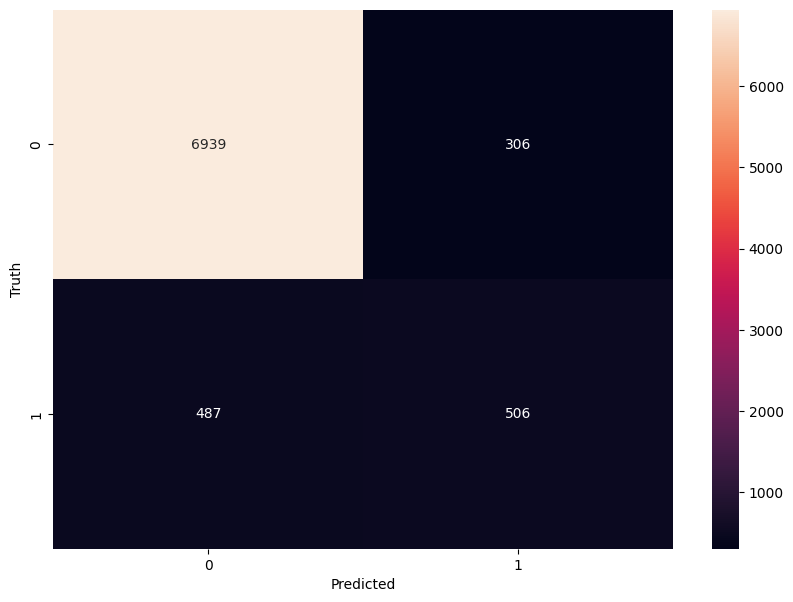

In [63]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# print(sum(cm[0])+sum(cm[1]) )
print( cm[0][0] + cm[1][1])  

#### Accuracy

In [67]:
round(int(cm[0][0]+cm[1][1]) / int(sum(cm[0])+sum(cm[1])),2)

0.9

#### Precision for 0 class. i.e. Precision for customers who did not subscibe.

In [68]:
round(int(cm[0][0]) /(int(cm[0][0])+int(cm[1][0])),2)

0.93

 
####  Precision for 1 class. i.e. Precision for customers who actually subscribed.

In [70]:
round(int(cm[1][1]) /(int(cm[1][1])+int(cm[0][1])),2)

0.62

#### Recall for 0 class

In [72]:
round(int(cm[0][0]) / int(sum(cm[0])),2)

0.96

#### Recall for 1 class

In [73]:
round(int(cm[1][1]) / int(sum(cm[1])),2)

0.51